In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import keras 
import tensorflow as tf
from keras.utils import to_categorical

In [2]:
data = pd.read_csv("breast-cancer.data",header=None)
data.columns = ['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']

In [3]:
data

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data:
    data[i] = le.fit_transform(data[i])

In [5]:
x= data.drop("irradiat",axis=1)
y = data["irradiat"]

In [6]:
x

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad
0,0,1,2,5,0,1,2,0,2
1,0,2,2,3,0,1,1,1,5
2,0,2,2,3,0,1,1,0,2
3,0,4,0,2,0,1,1,1,3
4,0,2,2,0,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...
281,1,1,2,5,0,1,1,0,3
282,1,1,2,3,0,1,2,0,3
283,1,4,0,3,0,1,0,1,3
284,1,2,0,5,4,1,2,0,2


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
281    0
282    1
283    0
284    0
285    0
Name: irradiat, Length: 286, dtype: int32

In [8]:
x.shape

(286, 9)

In [9]:
y.shape

(286,)

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

In [11]:
xtrain1 = np.array(xtrain)
xtest1 = np.array(xtest)
ytrain1 = np.array(ytrain)
ytest1 = np.array(ytest)

In [12]:
xtrain1 = xtrain1.reshape(xtrain1.shape[0],xtrain1.shape[1],1)
xtest1 = xtest1.reshape(xtest1.shape[0],xtest1.shape[1],1)

In [13]:
xtrain1.shape

(214, 9, 1)

In [14]:
xtest1.shape

(72, 9, 1)

In [15]:
ytrain1.shape

(214,)

In [16]:
ytest1.shape

(72,)

In [17]:
from keras.layers import LSTM,Dense,Activation,Flatten,Dropout
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(256,input_shape=(xtrain1.shape[1],1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(metrics= ["accuracy"],optimizer="adam",loss="categorical_crossentropy")

In [21]:
history = model.fit(xtrain1, ytrain1,batch_size=10,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 2/250
22/22 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 3/250
22/22 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 4/250
22/22 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 5/250
22/22 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 6/250
22/22 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 7/250
22/22 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 8/250
22/22 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 9/250
22/22 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 10/250
22/22 [==============================] - 0s 23ms/st

22/22 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 79/250
22/22 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 80/250
22/22 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 81/250
22/22 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 82/250
22/22 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 83/250
22/22 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 84/250
22/22 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 85/250
22/22 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 86/250
22/22 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 87/250
22/22 [==============================] - 0s 14ms/step -

22/22 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 156/250
22/22 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 157/250
22/22 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 158/250
22/22 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 159/250
22/22 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 160/250
22/22 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 161/250
22/22 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 162/250
22/22 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 163/250
22/22 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 164/250
22/22 [==============================] - 0s 20

22/22 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 233/250
22/22 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 234/250
22/22 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 235/250
22/22 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 236/250
22/22 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 237/250
22/22 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 238/250
22/22 [==============================] - 1s 27ms/step - loss: 0.0000e+00 - accuracy: 0.2383
Epoch 239/250
22/22 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - accuracy: 0.2383 0s - loss: 0.0000e+00 - accuracy: 
Epoch 240/250
22/22 [==============================] - 1s 26ms/step - loss: 0.0000e+00 - accuracy: 0.2383 0s - loss: 0.0000e+00 - a

In [22]:
history = pd.DataFrame(history.history)
history

,loss,accuracy
0,0.0,0.238318
1,0.0,0.238318
2,0.0,0.238318
3,0.0,0.238318
4,0.0,0.238318
...,...,...
245,0.0,0.238318
246,0.0,0.238318
247,0.0,0.238318
248,0.0,0.238318


<AxesSubplot:>

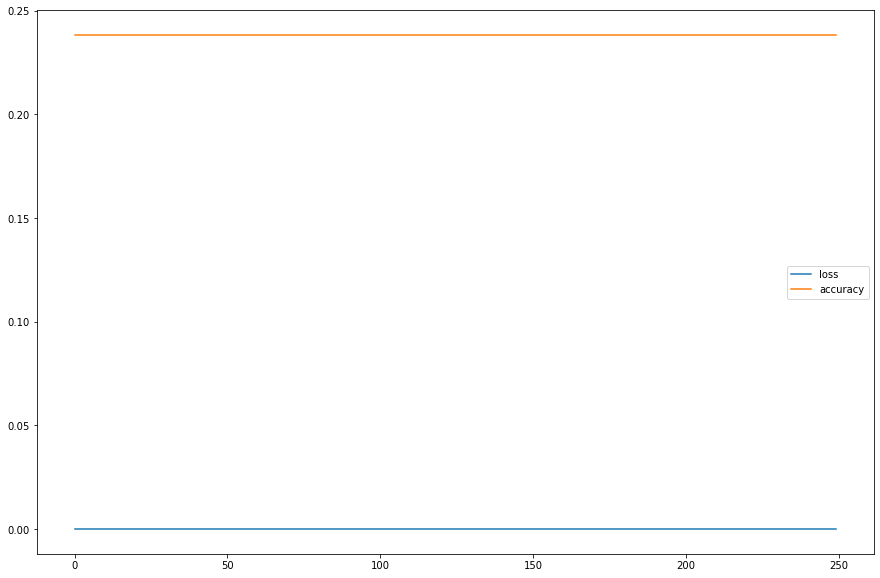

In [23]:
history.plot(figsize=(15,10))

In [24]:
ypredict = np.argmax(model.predict(xtest1), axis=-1)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest1,ypredict)

0.7638888888888888